In [1]:
import pandas as pd
data=pd.read_csv('Fraud.csv')
data.head()

C:\Users\SACH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SACH\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\SACH\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
'''
Now we can make some observations here, first one is that we donot have missing values in data set so we donot need to clean it,

Secondly we have two 'name' columns, which are 'nameOrig' and 'nameDest' which are of object type, and they have 6353307 and
2722362 unique values, which means we can not encode them and also name column will not be that useful in our prediction, so we
will go ahead and drop it
'''
data=data.drop(['nameOrig','nameDest'],axis=1)

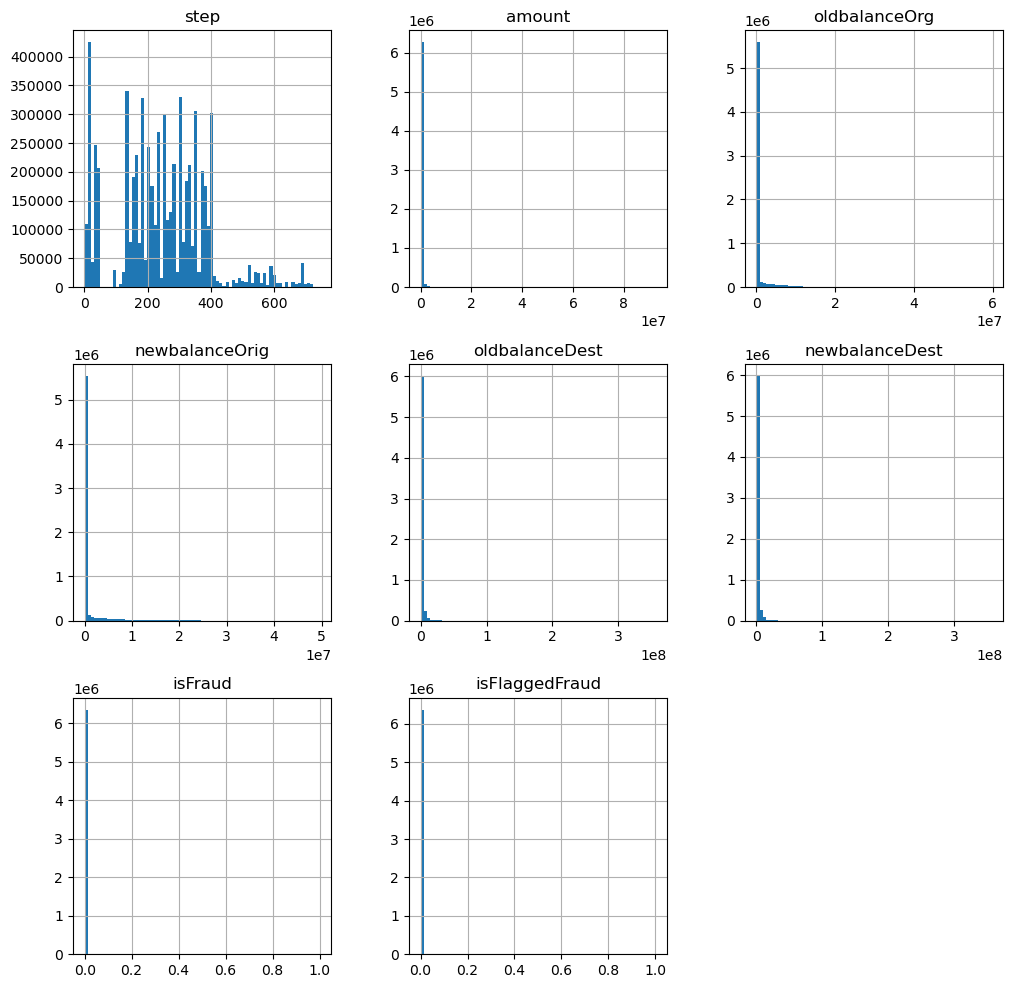

In [6]:
'''
Now we can have a look at our data in histogram formate to have a better understanding of it
'''
import matplotlib.pyplot as plt
data.hist(bins=75, figsize=(12, 12))
plt.show()

In [7]:
'''
Now we have to encode our 'type' column for this we will be using label encoder
'''
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
data['type']=le.fit_transform(data['type'])
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 412.6 MB


In [9]:
'''
Now that we have everything in integer or float type we can check correlation matrix to find which variables have how much
impact on our data
'''
corr_matrix=data.corr()
corr_matrix

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.002685,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


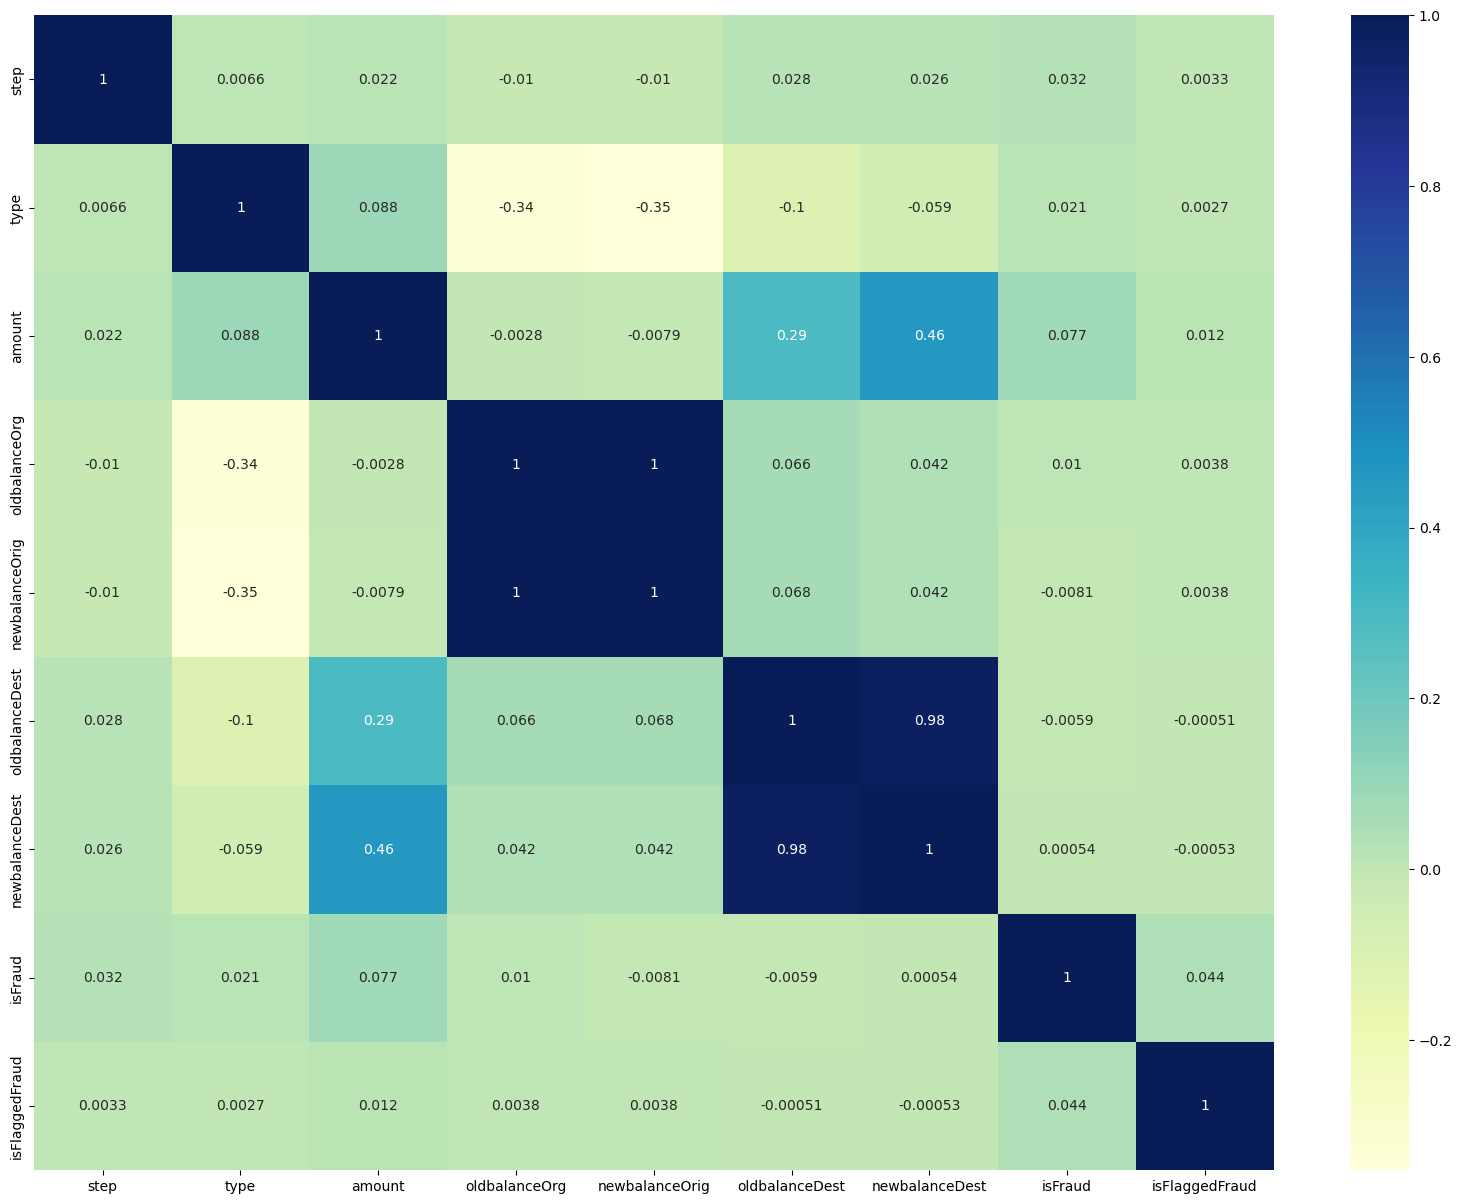

In [10]:
'''
To get a better understanding of our correlation matrix we will make a heatmap of it
'''
import seaborn as sns
plt.figure(figsize=(20, 15))
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [11]:
'''
since the corelation between new balance and old balance at origien and destination is always perfect we can drop one of those 
columns to make it simpler for our algorithm
'''

data=data.drop('newbalanceDest',axis=1)
data=data.drop('newbalanceOrig',axis=1)

In [19]:
'''
Now we need to select and classifier, but the data set is very large to run multiple models using lazy predict, so we will take 
a small fraction of it and then run the lazy predict on it, check which model fits us the best and then run it for our entire 
dataset
'''

model_data=data.sample(frac=0.01)

In [20]:
x=model_data.drop(columns='isFraud')
y=model_data['isFraud']
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)
#Note that random_state has been fixed just for reproducablity reasons it can also be changed but with that the value of accuracy is also subjected to change slightly

In [21]:
x_train

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud
5903645,403,1,11777.70,0.00,494546.48,0
1787986,162,0,6356.58,4239761.26,228946.39,0
609025,34,3,9471.18,1688.00,0.00,0
2730222,212,1,537840.13,0.00,945095.71,0
3187175,240,3,821.16,107556.00,0.00,0
...,...,...,...,...,...,...
1084501,129,3,3975.78,29907.00,0.00,0
602004,34,3,5482.21,0.00,0.00,0
43758,9,3,18209.75,23002.41,0.00,0
646707,35,3,737.73,253191.00,0.00,0


In [22]:
'''
The data we have is not scaled which can hinder the accuracy of our predictions, therefore we need to scale the data first
'''


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)



In [24]:
'''
This is required only if you are running the notebook first time in your local system, or you are running it on google colab
'''

!pip install lazypredict

In [25]:
'''
Lazy predict basically goes through various classifers and checks which one of them is best for our dataset.
'''

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:23<00:00,  1.22it/s]

[LightGBM] [Info] Number of positive: 56, number of negative: 50844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 50900, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001100 -> initscore=-6.811166
[LightGBM] [Info] Start training from score -6.811166


In [27]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.95,0.73,0.73,0.97,0.02
DecisionTreeClassifier,1.00,0.70,0.70,1.00,0.16
XGBClassifier,1.00,0.67,0.67,1.00,0.16
LGBMClassifier,1.00,0.67,0.67,1.00,0.21
ExtraTreesClassifier,1.00,0.65,0.65,1.00,1.01
BaggingClassifier,1.00,0.63,0.63,1.00,0.83
RandomForestClassifier,1.00,0.63,0.63,1.00,2.65
ExtraTreeClassifier,1.00,0.63,0.63,1.00,0.03
AdaBoostClassifier,1.00,0.54,0.54,1.00,1.44


In [37]:
'''
Now since it was done only on fraction of data we can not for sure say that the model with highest accuracy here will also give
highest accuracy for entire data set, so what we will do is we will run top 4 classifiers one by one and check their accuracy 
for our dataset. So in this cell we will create instances of all the models we are going to use, and they are as follows
-->Nearest Centroid
-->Decision Tree Classifier
-->XGB Classifer
-->LGBM Classifer
'''
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as ltb

model_nearest = NearestCentroid()
model_tree = DecisionTreeClassifier()
model_xgb = xgb.XGBClassifier()
model_LGBM = ltb.LGBMClassifier(force_row_wise=True)

In [30]:
'''
Now we need to perform scaling and test train split on our entire data set(eariler we had done it only on a part of it)
'''
x=data.drop(columns='isFraud')
y=data['isFraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)
#Note that random_state has been fixed just for reproducablity reasons it can also be changed but with that the value of accuracy is also subjected to change slightly

scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [41]:
'''
Now we need to train all of our models
'''
model_nearest = model_nearest.fit(x_train_scaled,y_train)

In [43]:
model_tree = model_tree.fit(x_train_scaled,y_train)

In [44]:
model_xgb = model_xgb.fit(x_train_scaled,y_train)

In [45]:
model_LGBM = model_LGBM.fit(x_train_scaled,y_train)

[LightGBM] [Info] Number of positive: 6553, number of negative: 5083543
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001287 -> initscore=-6.653841
[LightGBM] [Info] Start training from score -6.653841


In [46]:
'''
Now what we will do is that we will use all of these models to predict on our test set, and store their accuracy in an array
for this we will first predict and then use accuracy_score from sklearn to evaluate our model
'''
from sklearn.metrics import accuracy_score
accuracy = []
pred_nearest = model_nearest.predict(x_test_scaled)
accuracy.append(['Nearest Centroid',accuracy_score(pred_nearest,y_test)])

pred_tree = model_tree.predict(x_test_scaled)
accuracy.append(['Decision Tree classifier',accuracy_score(pred_tree,y_test)])

pred_xgb = model_xgb.predict(x_test_scaled)
accuracy.append(['XGB classifier',accuracy_score(pred_xgb,y_test)])

pred_LGBM = model_LGBM.predict(x_test_scaled)
accuracy.append(['LGBM classifier',accuracy_score(pred_LGBM,y_test)])

In [47]:
accuracy

[['Nearest Centroid', 0.9769025967290205],
 ['Decision Tree classifier', 0.9993744715227375],
 ['XGB classifier', 0.9996424428930221],
 ['LGBM classifier', 0.9986774316240794]]

In [50]:
'''
Now since our dataset has large number of negative(false) values it is good to look at one more matrix that is 'recall score'
This will be useful to undestand how well does model predict positives
'''
from sklearn.metrics import recall_score

recall = []


recall.append(['Nearest Centroid',recall_score(pred_nearest,y_test)])


recall.append(['Decision Tree classifier',recall_score(pred_tree,y_test)])

recall.append(['XGB classifier',recall_score(pred_xgb,y_test)])


recall.append(['LGBM classifier',recall_score(pred_LGBM,y_test)])

In [51]:
recall

[['Nearest Centroid', 0.023210233133897255],
 ['Decision Tree classifier', 0.755621301775148],
 ['XGB classifier', 0.931899641577061],
 ['LGBM classifier', 0.4933870040253019]]

In [58]:
'''
From here we can see that best model is XGB classifer, we will find few other scores and confusion matrix for XGB classfier
which would then be the conclusion of this model
'''
from sklearn import metrics
F1_score = metrics.f1_score(y_test, pred_xgb)
F1_score

0.8510638297872342

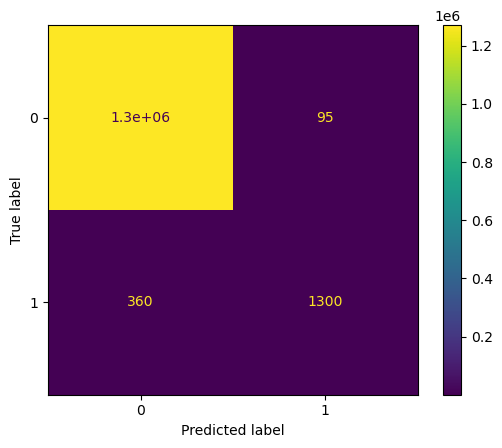

In [65]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
